### 1. 일일 확진자의 추이
### 2. 감염경로(해외,국내)에 따른 신규 확진자
### 3. 코로나 전체 추이(확진,사망,격리해제)
### 4. 확진자의 이동평균선으로 안정화되는 단계 예측


### 가설1. 검사수와 확진자 수는 연관이 있나?
### 가설2. 주말과 평일 검사수와 확진자 수가 차이가 많이 날까?
### 가설3. 코로나는 계절과 관련이 있을까?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('corona.xlsx')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,date,confirmed,domestic,Overseas,사망(명),released,tested,negative,critical
4,sum,226854,213935,12919,2173,196198,12372777,11552071,353
...,...,...,...,...,...,...,...,...,...
576,2021-08-13 00:00:00,1990,1913,77,6,192248,12257966,11498250,369
577,2021-08-14 00:00:00,1928,1858,70,4,193778,12309280,11524466,386
578,2021-08-15 00:00:00,1816,1748,68,8,195103,12344718,11535662,374
579,2021-08-16 00:00:00,1556,1493,63,11,196198,12372777,11552071,353


In [3]:
# 칼럼명 바꾸기
df.columns = ['date','confirmed','domestic','overseas','death','released','tested','negative','critical']
df.columns

Index(['date', 'confirmed', 'domestic', 'overseas', 'death', 'released',
       'tested', 'negative', 'critical'],
      dtype='object')

In [4]:
# 앞의 NaN 값 제거
df = df[5:]
# 인덱스 date로 설정
df.set_index('date',inplace=True)

In [5]:
df

,confirmed,domestic,overseas,death,released,tested,negative,critical
date,,,,,,,,
2020-01-20,1,0,1,0,0,1,0,0
2020-01-21,0,0,0,0,0,1,0,0
2020-01-22,0,0,0,0,0,1,0,0
2020-01-23,0,0,0,0,0,1,0,0
2020-01-24,1,0,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...
2021-08-13,1990,1913,77,6,192248,12257966,11498250,369
2021-08-14,1928,1858,70,4,193778,12309280,11524466,386
2021-08-15,1816,1748,68,8,195103,12344718,11535662,374


In [6]:
# 누적으로 되어있는 통계 일별로 바꾸기
df['released'] = df['released']- df['released'].shift(1)
df['tested'] = df['tested'] - df['tested'].shift(1)
df['negative'] = df['negative'] - df['negative'].shift(1)
df['critical'] = df['critical'] - df['critical'].shift(1)
df

<ipython-input-6-e7cbad7f3344>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['released'] = df['released']- df['released'].shift(1)
<ipython-input-6-e7cbad7f3344>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tested'] = df['tested'] - df['tested'].shift(1)
<ipython-input-6-e7cbad7f3344>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,confirmed,domestic,overseas,death,released,tested,negative,critical
date,,,,,,,,
2020-01-20,1,0,1,0,NaN,NaN,NaN,NaN
2020-01-21,0,0,0,0,0,0,0,0
2020-01-22,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0
2020-01-24,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
2021-08-13,1990,1913,77,6,1713,50925,19496,-3
2021-08-14,1928,1858,70,4,1530,51314,26216,17
2021-08-15,1816,1748,68,8,1325,35438,11196,-12


### 컬럼명 이해
#### date: 날짜
#### confirmed:확진자 수
#### domestic : 국내 확진자
#### overseas : 해외 유입
#### death : 사망자
#### released : 격리 해제
#### tested : 검사자 수
#### negative : 음성 판정 수
#### critical : 위중증 환자 수

In [7]:
# 7-8월 확진자수 
df_July_Aug = df.iloc[528:]
df_July_Aug.reset_index(inplace=True) # 인덱스 리셋
df_July_Aug

,date,confirmed,domestic,overseas,death,released,tested,negative,critical
0,2021-07-01,761,711,50,3,331,35244,23668,-5
1,2021-07-02,825,765,60,3,295,27286,20720,1
2,2021-07-03,794,748,46,1,813,29015,24978,-1
3,2021-07-04,743,662,81,1,482,14508,11377,-1
4,2021-07-05,711,644,67,2,430,15009,15702,-4
5,2021-07-06,746,690,56,4,716,35582,28030,5
6,2021-07-07,1212,1167,45,1,740,30786,28525,11
7,2021-07-08,1275,1227,48,1,423,36280,26595,-2
8,2021-07-09,1316,1236,80,2,575,41435,30809,-5
9,2021-07-10,1378,1320,58,2,655,37423,26794,0


In [8]:
# 최근 일주일간의 데이터 프레임 생성
df_weekend = df_July_Aug[39:]
df_weekend

,date,confirmed,domestic,overseas,death,released,tested,negative,critical
39,2021-08-09,1491,1455,36,4,1239,30387,27667,-9
40,2021-08-10,1537,1474,63,9,1281,54255,54304,12
41,2021-08-11,2222,2144,78,1,1983,44113,19746,8
42,2021-08-12,1987,1947,40,3,1029,50843,26827,-15
43,2021-08-13,1990,1913,77,6,1713,50925,19496,-3
44,2021-08-14,1928,1858,70,4,1530,51314,26216,17
45,2021-08-15,1816,1748,68,8,1325,35438,11196,-12
46,2021-08-16,1556,1493,63,11,1095,28059,16409,-21
47,2021-08-17,1373,1323,50,6,1026,32200,5372,1


## 1. 7-8월 일일 확진자 추이

<AxesSubplot:xlabel='date', ylabel='confirmed'>

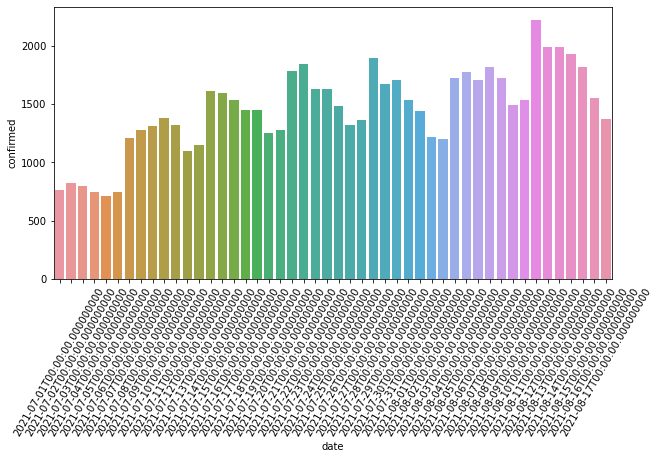

In [9]:
# 7-8월 일일 확진자 바로 표시
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
sns.barplot(data=df_July_Aug, x='date', y='confirmed')

<AxesSubplot:xlabel='date', ylabel='confirmed'>

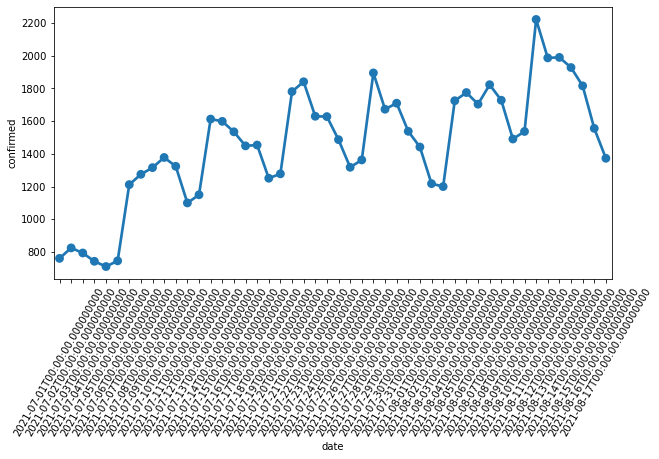

In [10]:
# 7-8월 일일 확진자 점으로 표시
plt.figure(figsize=(10,5))
plt.xticks(rotation=60)
sns.pointplot(data=df_July_Aug, x='date',y='confirmed')

<AxesSubplot:xlabel='date', ylabel='tested'>

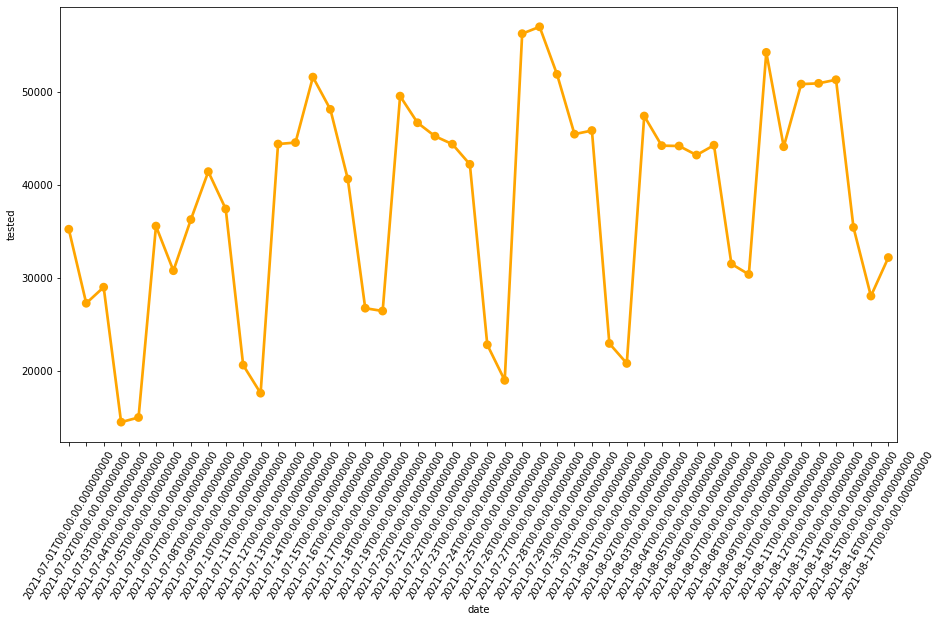

In [11]:
# 검사자 수
plt.figure(figsize=(15,8)) 
plt.xticks(rotation=60) 
sns.pointplot(data=df_July_Aug, x='date',y='tested',color='orange')

## 가설 1 - 검사자 수와 확진자 수는 연관이 있나?

<AxesSubplot:xlabel='tested', ylabel='confirmed'>

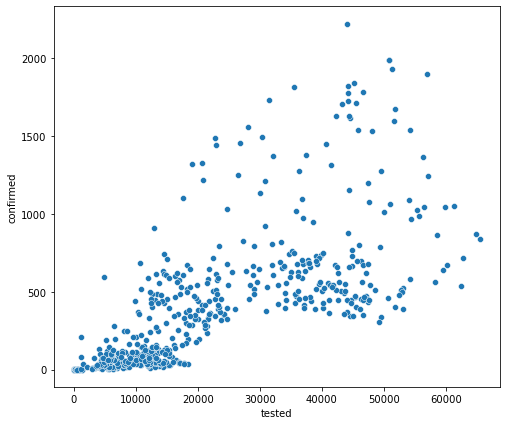

In [12]:
# 검사자 수가 많을수록 대체적으로 확진자 수가 증가한다.
plt.figure(figsize=(8,7))
sns.scatterplot(data=df, x='tested', y='confirmed' )

## 7-8월 확진자 수와 격리해제 수 비교

<AxesSubplot:xlabel='date', ylabel='released'>

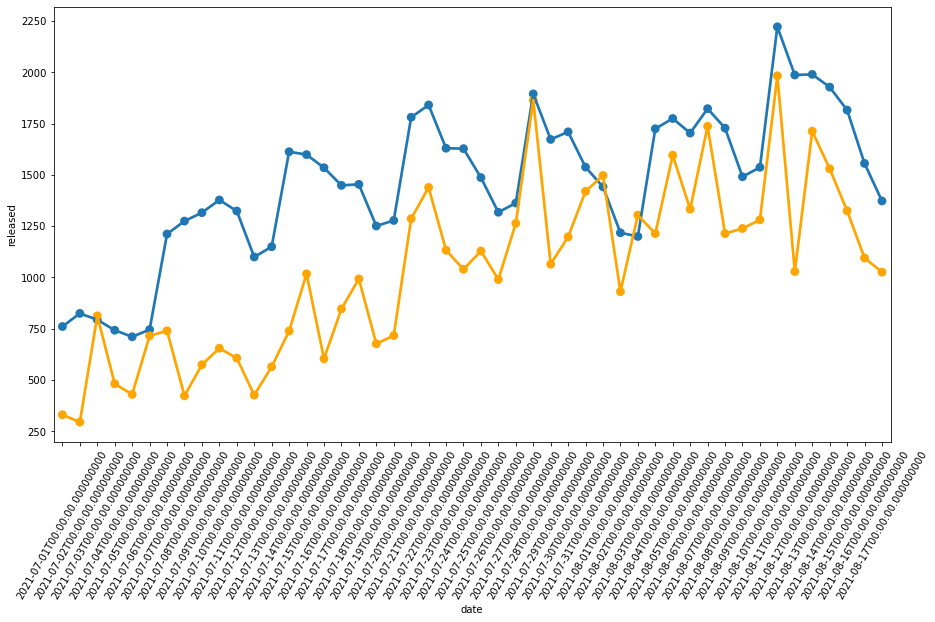

In [13]:
# 7-8월 확진자 수와 격리해제 수 
plt.figure(figsize=(15,8)) 
plt.xticks(rotation=60) 
sns.pointplot(data=df_July_Aug, x='date',y='confirmed') # 확진자 수
sns.pointplot(data=df_July_Aug, x='date',y='released',color='orange') # 격리해제 수

## 2. 7-8월 감염경로 비교

<AxesSubplot:xlabel='date', ylabel='domestic'>

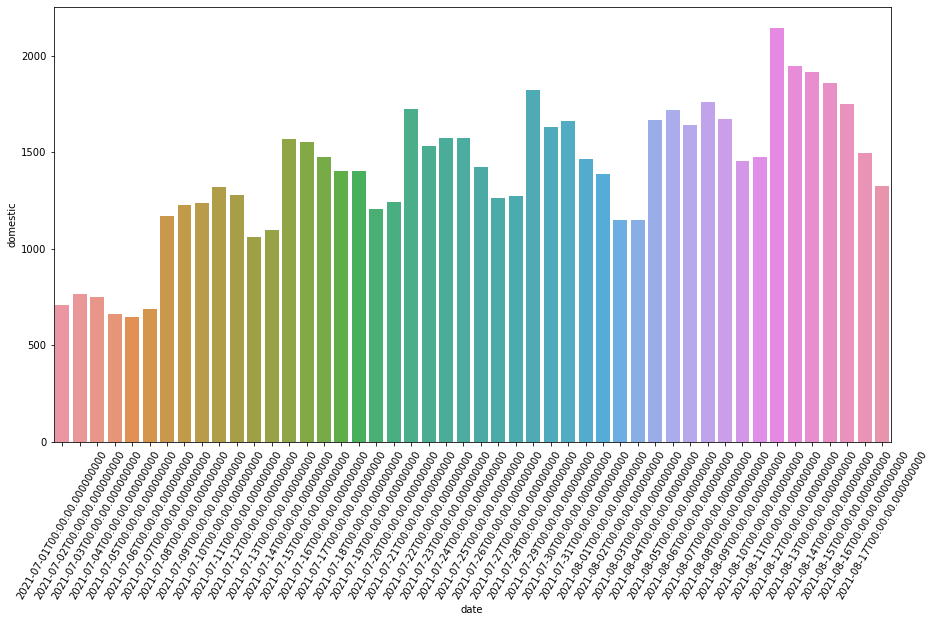

In [14]:
# 7-8월 국내 확진자 수
plt.figure(figsize=(15,8)) 
plt.xticks(rotation=60) 
sns.barplot(data=df_July_Aug, x='date', y='domestic')

<AxesSubplot:xlabel='date', ylabel='overseas'>

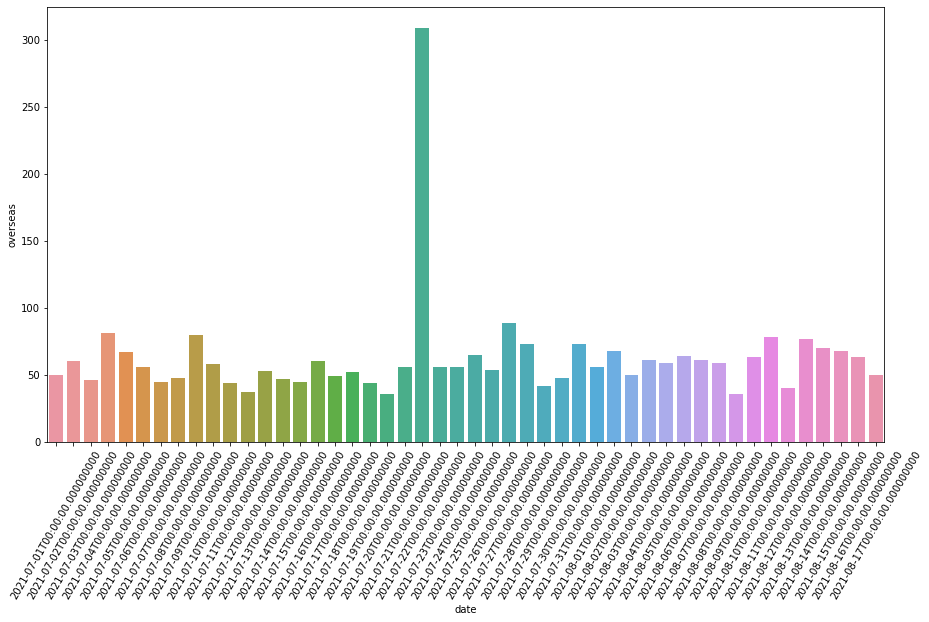

In [15]:
# 7-8월 해외 유입 수
plt.figure(figsize=(15,8)) 
plt.xticks(rotation=60) 
sns.barplot(data=df_July_Aug, x='date', y='overseas') # 7월 22일 해외파병이던 청해부대 247명이 확진 된것을 해외사례로 집계

<AxesSubplot:xlabel='date', ylabel='overseas'>

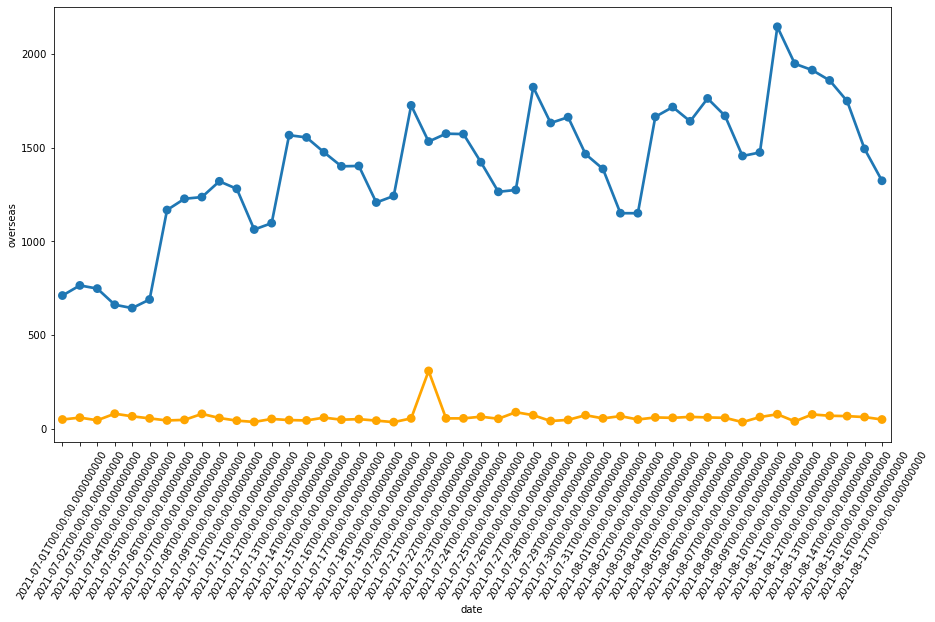

In [16]:
# 7-8월 국내 확진자 수와 해외 유입 수
plt.figure(figsize=(15,8)) 
plt.xticks(rotation=60) 
sns.pointplot(data=df_July_Aug, x='date',y='domestic') # 국내 확진자 수
sns.pointplot(data=df_July_Aug, x='date',y='overseas',color='orange') # 해외 유입 수

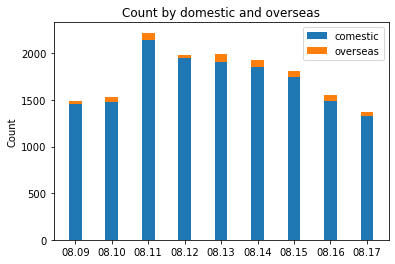

In [17]:
# 스택 바로 최근 일주일 감영경로 비교

labels = ['08.09','08.10','08.11','08.12','08.13','08.14','08.15','08.16','08.17']
domestic_means = [1455,1474,2144,1947,1913,1858,1748,1493,1323]
overseas_means = [36,63,78,40,77,70,68,63,50]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, domestic_means, width,  label='comestic')
ax.bar(labels, overseas_means, width,  bottom=domestic_means,
       label='overseas')

ax.set_ylabel('Count')
ax.set_title('Count by domestic and overseas')
ax.legend()

plt.show()



## 3. 7-8 월 코로나 전체 추이(확진,사망,격리해제)

<AxesSubplot:xlabel='date', ylabel='released'>

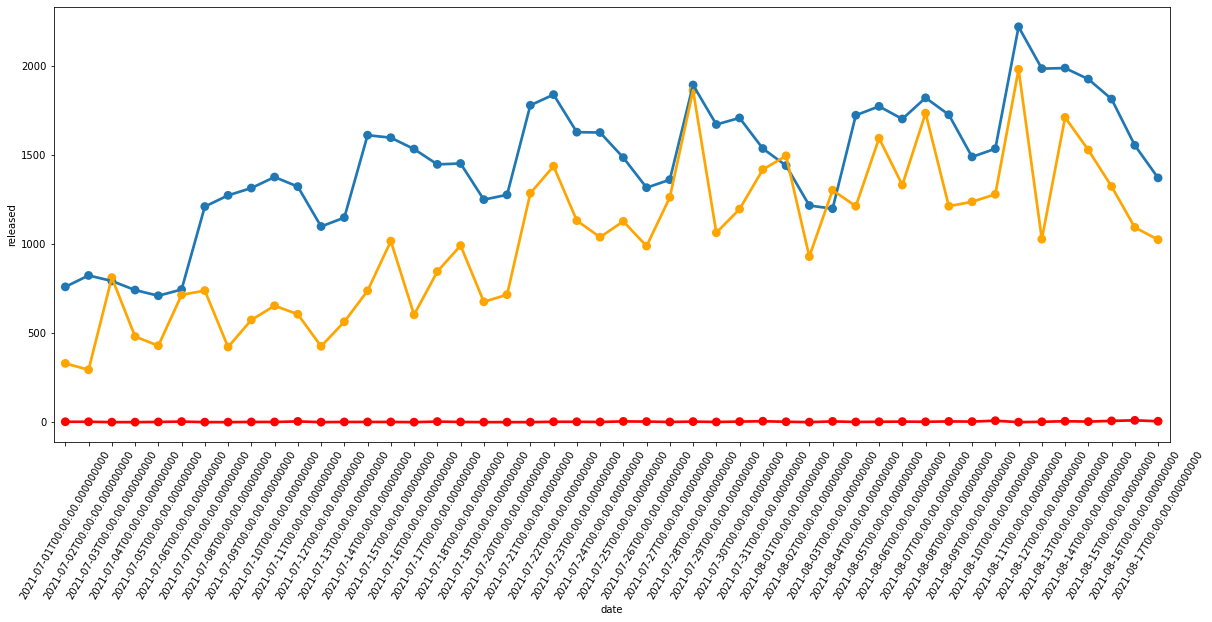

In [18]:
# 7-8월 확진자 수와 격리해제 수 
plt.figure(figsize=(20,8)) 
plt.xticks(rotation=60) 
sns.pointplot(data=df_July_Aug, x='date',y='confirmed') # 확진자 수
sns.pointplot(data=df_July_Aug, x='date',y='death',color='red') # 사망자 수
sns.pointplot(data=df_July_Aug, x='date',y='released',color='orange') # 격리 해제 수

<AxesSubplot:xlabel='date', ylabel='death'>

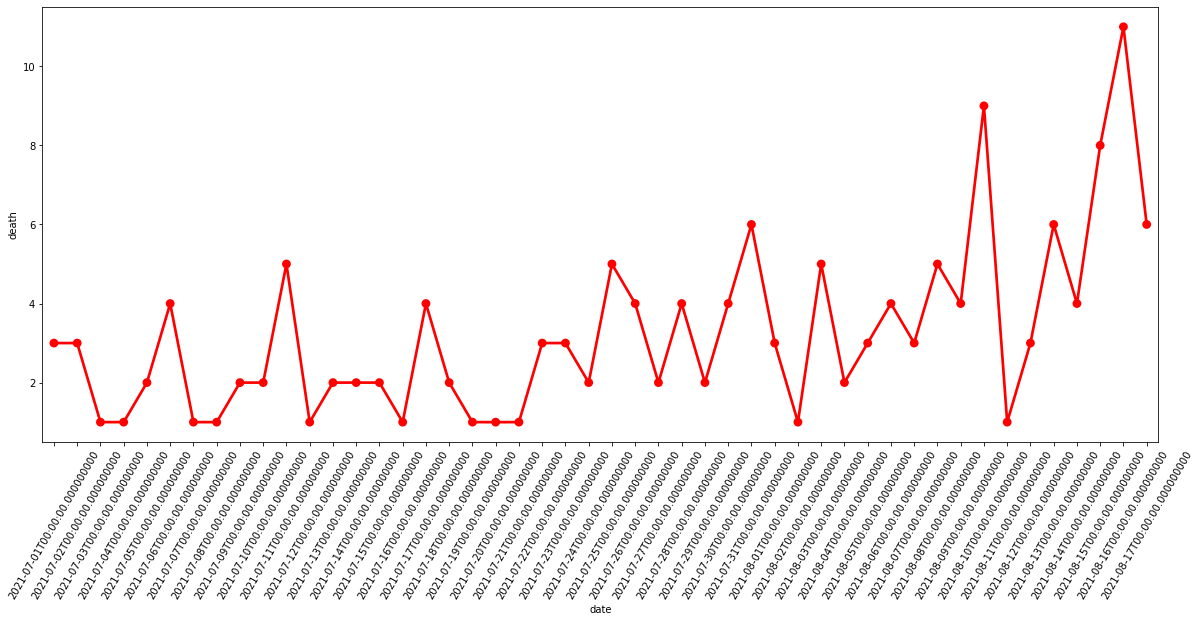

In [19]:
# 사망자 수가 낮기 때문에 따로 시각화
plt.figure(figsize=(20,8)) 
plt.xticks(rotation=60) 
sns.pointplot(data=df_July_Aug, x='date',y='death',color='red') # 사망자 수

<AxesSubplot:xlabel='date', ylabel='confirmed'>

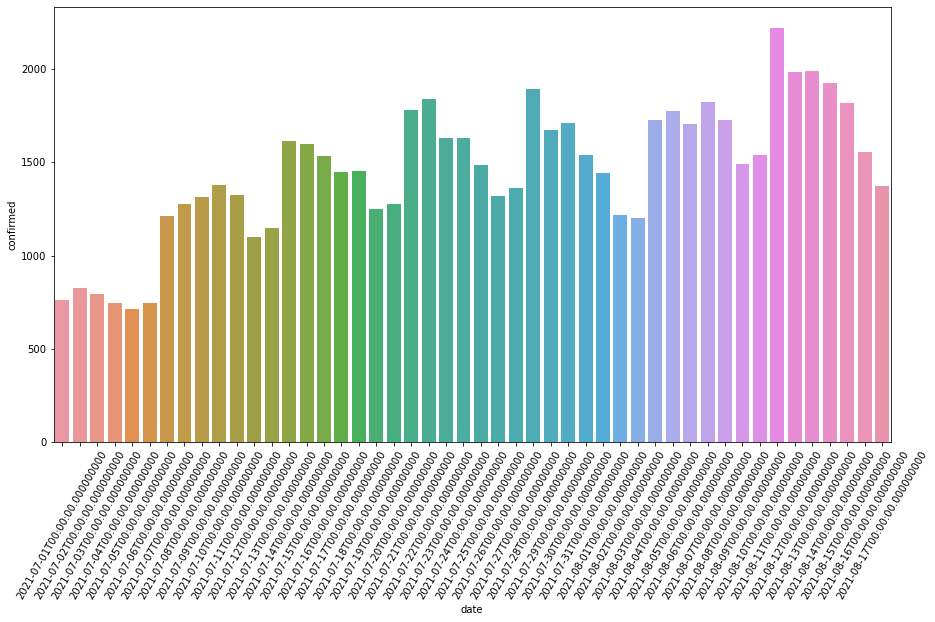

In [20]:
# 7-8월 확진자수
plt.figure(figsize=(15,8)) 
plt.xticks(rotation=60) 
sns.barplot(data=df_July_Aug, x='date', y='confirmed')

<AxesSubplot:xlabel='date', ylabel='released'>

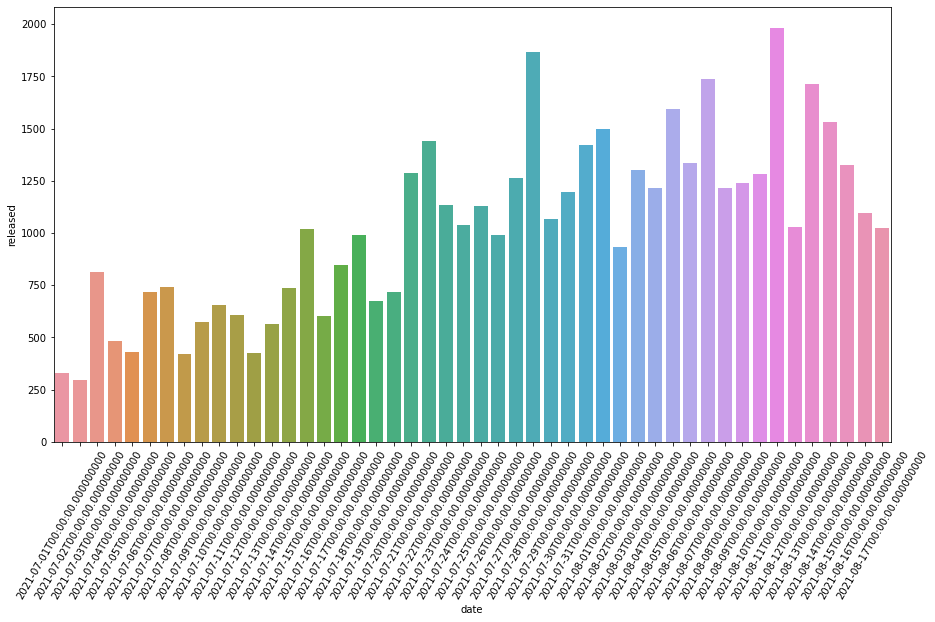

In [21]:
# 7-8월 격리해제 수
plt.figure(figsize=(15,8)) 
plt.xticks(rotation=60) 
sns.barplot(data=df_July_Aug, x='date', y='released')

<AxesSubplot:xlabel='date', ylabel='death'>

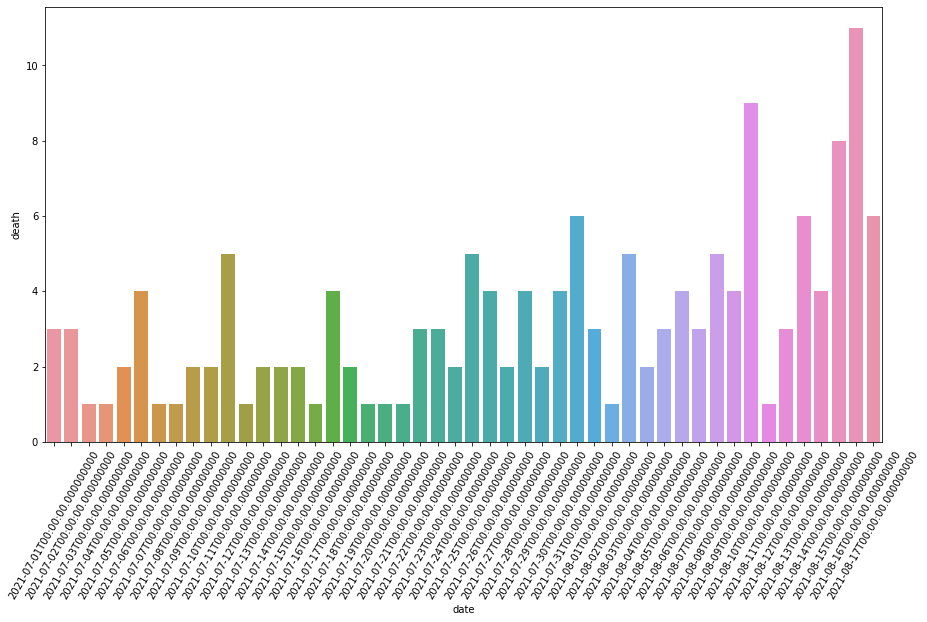

In [22]:
# 7-8월 사망자 수
plt.figure(figsize=(15,8)) 
plt.xticks(rotation=60) 
sns.barplot(data=df_July_Aug, x='date', y='death')

## 코로나 시작부터 지금까지의 확진자 추이

In [23]:
df.reset_index(inplace=True) # date로 인덱스 되있는것을 리셋
df

,date,confirmed,domestic,overseas,death,released,tested,negative,critical
0,2020-01-20,1,0,1,0,NaN,NaN,NaN,NaN
1,2020-01-21,0,0,0,0,0,0,0,0
2,2020-01-22,0,0,0,0,0,0,0,0
3,2020-01-23,0,0,0,0,0,0,0,0
4,2020-01-24,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
571,2021-08-13,1990,1913,77,6,1713,50925,19496,-3
572,2021-08-14,1928,1858,70,4,1530,51314,26216,17
573,2021-08-15,1816,1748,68,8,1325,35438,11196,-12
574,2021-08-16,1556,1493,63,11,1095,28059,16409,-21


In [24]:
df['date']

0     2020-01-20
1     2020-01-21
2     2020-01-22
3     2020-01-23
4     2020-01-24
         ...    
571   2021-08-13
572   2021-08-14
573   2021-08-15
574   2021-08-16
575   2021-08-17
Name: date, Length: 576, dtype: datetime64[ns]

<AxesSubplot:xlabel='date', ylabel='confirmed'>

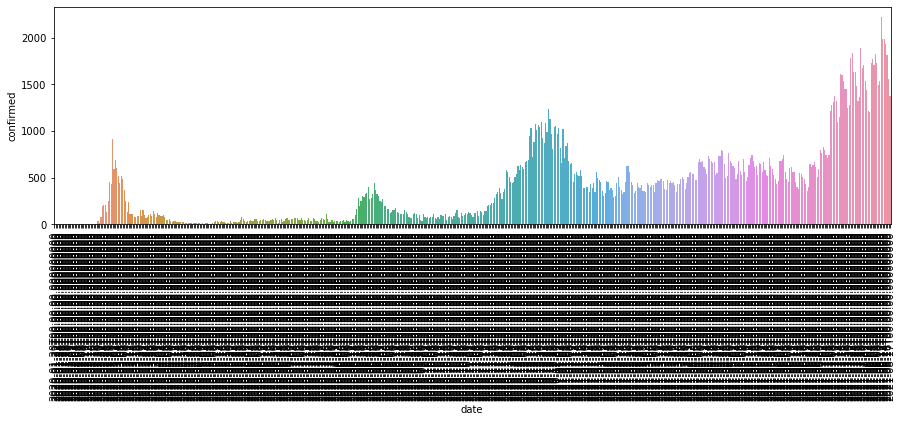

In [25]:
# 코로나 시작부터 지금까지의 확진자 수 -2
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
sns.barplot(data=df, x='date', y='confirmed')

<AxesSubplot:xlabel='date', ylabel='tested'>

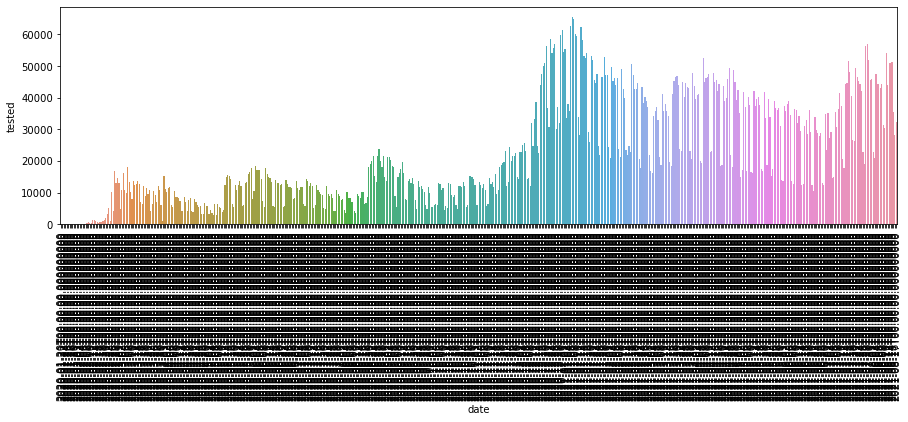

In [26]:
# 코로나 시작부터 지금까지의 검사현황 -2
plt.figure(figsize=(15,4))
plt.xticks(rotation=90)
sns.barplot(data=df, x='date', y='tested')

## 가설 2 주말과 평일간의 확진자 및 검사자 차이가 발생할까?

In [27]:
df['date'] = pd.to_datetime(df['date'])
df

<ipython-input-27-05f724c9742a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


,date,confirmed,domestic,overseas,death,released,tested,negative,critical
0,2020-01-20,1,0,1,0,NaN,NaN,NaN,NaN
1,2020-01-21,0,0,0,0,0,0,0,0
2,2020-01-22,0,0,0,0,0,0,0,0
3,2020-01-23,0,0,0,0,0,0,0,0
4,2020-01-24,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
571,2021-08-13,1990,1913,77,6,1713,50925,19496,-3
572,2021-08-14,1928,1858,70,4,1530,51314,26216,17
573,2021-08-15,1816,1748,68,8,1325,35438,11196,-12
574,2021-08-16,1556,1493,63,11,1095,28059,16409,-21


In [28]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.week
df['day'] = df['date'].dt.day_name()
df

<ipython-input-28-7fc01105e7cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
<ipython-input-28-7fc01105e7cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].dt.month
<ipython-input-28-7fc01105e7cd>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week
<ipython-input-28-7fc01105e7cd>:3: SettingWithCopyWarning: 
A value is trying to be set 

,date,confirmed,domestic,overseas,death,released,tested,negative,critical,year,month,week,day
0,2020-01-20,1,0,1,0,NaN,NaN,NaN,NaN,2020,1,4,Monday
1,2020-01-21,0,0,0,0,0,0,0,0,2020,1,4,Tuesday
2,2020-01-22,0,0,0,0,0,0,0,0,2020,1,4,Wednesday
3,2020-01-23,0,0,0,0,0,0,0,0,2020,1,4,Thursday
4,2020-01-24,1,0,1,0,0,1,0,0,2020,1,4,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2021-08-13,1990,1913,77,6,1713,50925,19496,-3,2021,8,32,Friday
572,2021-08-14,1928,1858,70,4,1530,51314,26216,17,2021,8,32,Saturday
573,2021-08-15,1816,1748,68,8,1325,35438,11196,-12,2021,8,32,Sunday
574,2021-08-16,1556,1493,63,11,1095,28059,16409,-21,2021,8,33,Monday


In [29]:
df.groupby('day')['confirmed'].sum()

day
Friday       34197
Monday       28001
Saturday     34658
Sunday       32086
Thursday     34600
Tuesday      28201
Wednesday    35111
Name: confirmed, dtype: int64

In [30]:
# 요일별 새로운 데이터 프레임 생성하기
pdf = pd.pivot_table(df,                # 피벗할 데이터프레임
                     index = 'day',    # 행 위치에 들어갈 열
                     values = ['confirmed','tested'],     # 데이터로 사용할 열
                     aggfunc = 'sum')

pdf.reset_index(inplace=True)


# pdf['weekend'] = [0,1,2,3,4,5,6,7]
pdf

# pdf.sort_values(by='weekend',ascending=False)

# 요일을 정렬할 때 새로운 컬럼 w0, w1,.. 등으로 만들고 그 컬럼값으로 정렬을 한다.

,day,confirmed,tested
0,Friday,34197,2057452
1,Monday,28001,1029726
2,Saturday,34658,1955214
3,Sunday,32086,1104657
4,Thursday,34600,2010745
5,Tuesday,28201,2185597
6,Wednesday,35111,2061585


<BarContainer object of 7 artists>

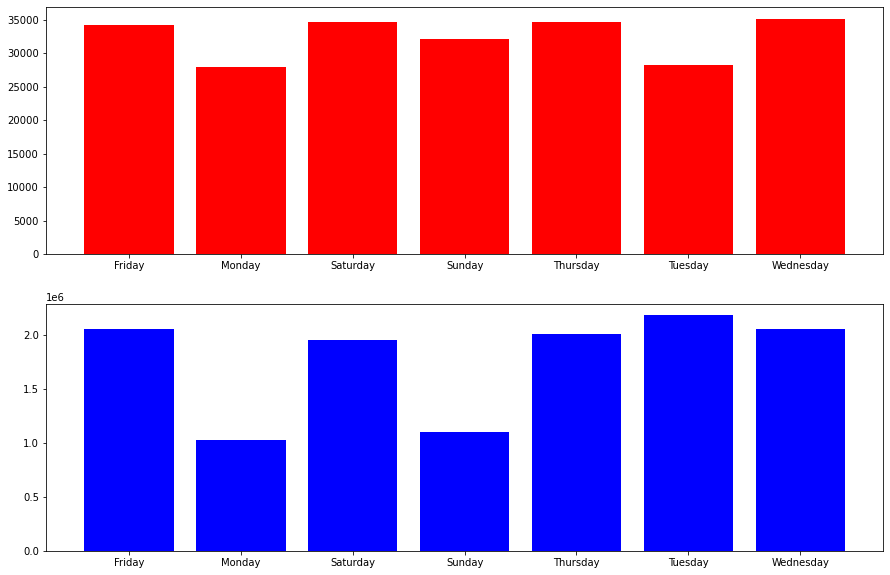

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
# 요일별 확진자 수
axes[0].bar(pdf['day'], pdf['confirmed'], color='r')
# 요일별 검사자 수
axes[1].bar(pdf['day'], pdf['tested'], color='b')

# => 일요일과 월요일에 검사자 수가 적긴 하지만, 확진자수는 크게 차이가 나지 않는다.

## 가설3. 계절에 따라 확진자 수가 달라질까?

In [32]:
# 월별 새로운 데이터 프레임 생성하기
pdf1 = pd.pivot_table(df,                # 피벗할 데이터프레임
                     index = 'month',    # 행 위치에 들어갈 열
                     values = ['confirmed','tested'],     # 데이터로 사용할 열
                     aggfunc = 'sum')

pdf1.reset_index(inplace=True)
pdf1

,month,confirmed,tested
0,1,17482,1427253
1,2,14387,1101934
2,3,20270,1375302
3,4,19906,1349810
4,5,19034,1203806
5,6,17954,1180858
6,7,42884,1439779
7,8,34156,1050050
8,9,3865,385310
9,10,2700,301493


<BarContainer object of 12 artists>

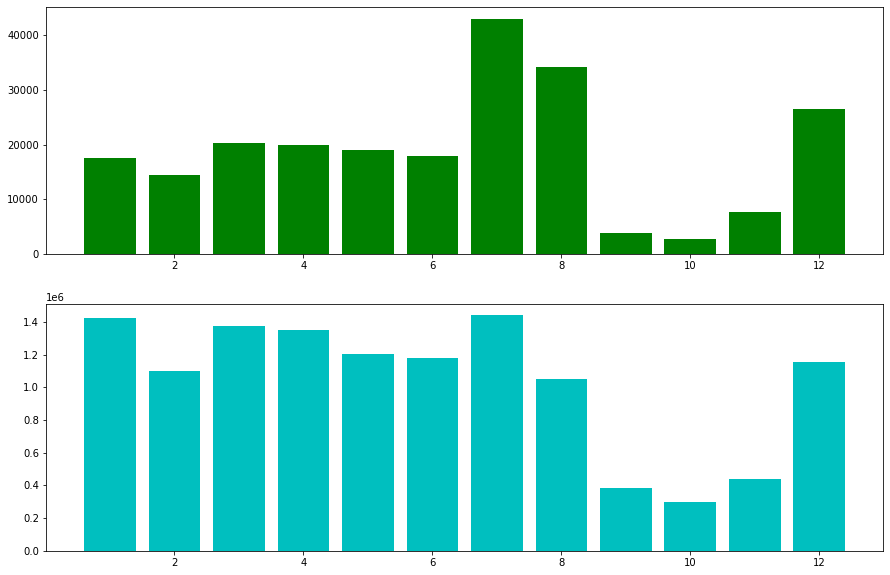

In [33]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
# 월별 확진자 수
axes[0].bar(pdf1['month'], pdf1['confirmed'], color='g')
# 월별 검사자 수
axes[1].bar(pdf1['month'], pdf1['tested'], color='c')

# => 현재 2021년 8월이지만 코로나가 시작된 시기가 2020년 초임을 감안하면, 겨울보다는 여름이 더 많이 발생한다.

<AxesSubplot:xlabel='month', ylabel='confirmed'>

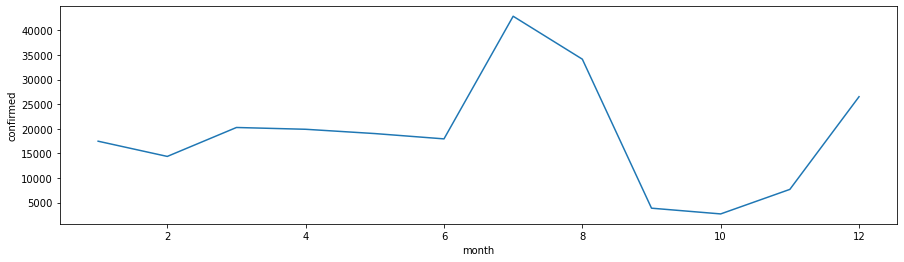

In [34]:
plt.figure(figsize=(15,4))
sns.lineplot(data=pdf1, x='month',y='confirmed')

C:\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the marke

<AxesSubplot:xlabel='month', ylabel='confirmed'>

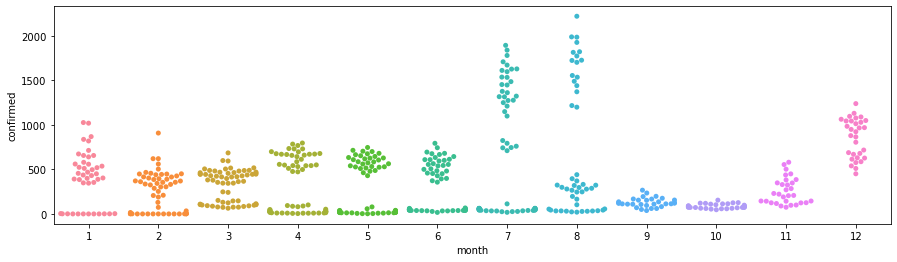

In [35]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df,x='month',y='confirmed')

<AxesSubplot:xlabel='month', ylabel='confirmed'>

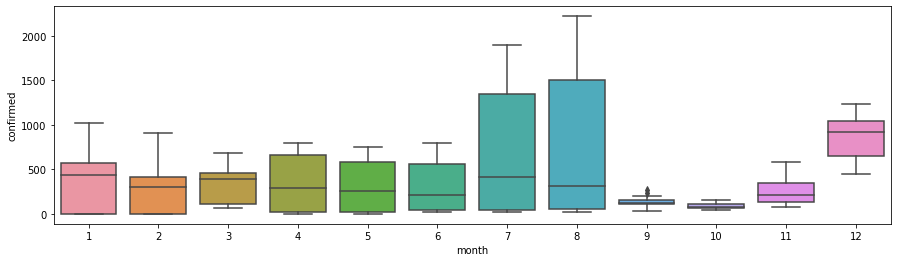

In [36]:
# boxplot 으로 월별 확진자 수 시각화
plt.figure(figsize=(15,4))
sns.boxplot(data=df,x='month',y='confirmed')

## 4. 확진자 이동평균선

In [37]:
df['MA_5'] = df['confirmed'].rolling(window=5).mean()

df['MA_10'] = df['confirmed'].rolling(window=10).mean()

df['MA_30'] = df['confirmed'].rolling(window=30).mean()

df['MA_60'] = df['confirmed'].rolling(window=60).mean()

df['MA_120'] = df['confirmed'].rolling(window=120).mean()

<ipython-input-37-01c3454dade9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_5'] = df['confirmed'].rolling(window=5).mean()
<ipython-input-37-01c3454dade9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_10'] = df['confirmed'].rolling(window=10).mean()
<ipython-input-37-01c3454dade9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [38]:
df

,date,confirmed,domestic,overseas,death,released,tested,negative,critical,year,month,week,day,MA_5,MA_10,MA_30,MA_60,MA_120
0,2020-01-20,1,0,1,0,NaN,NaN,NaN,NaN,2020,1,4,Monday,NaN,NaN,NaN,NaN,NaN
1,2020-01-21,0,0,0,0,0,0,0,0,2020,1,4,Tuesday,NaN,NaN,NaN,NaN,NaN
2,2020-01-22,0,0,0,0,0,0,0,0,2020,1,4,Wednesday,NaN,NaN,NaN,NaN,NaN
3,2020-01-23,0,0,0,0,0,0,0,0,2020,1,4,Thursday,NaN,NaN,NaN,NaN,NaN
4,2020-01-24,1,0,1,0,0,1,0,0,2020,1,4,Friday,0.4,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2021-08-13,1990,1913,77,6,1713,50925,19496,-3,2021,8,32,Friday,1845.4,1798.2,1609.066667,1198.466667,900.575000
572,2021-08-14,1928,1858,70,4,1530,51314,26216,17,2021,8,32,Saturday,1932.8,1818.5,1620.033333,1224.383333,911.033333
573,2021-08-15,1816,1748,68,8,1325,35438,11196,-12,2021,8,32,Sunday,1988.6,1822.6,1629.400000,1245.566667,920.683333
574,2021-08-16,1556,1493,63,11,1095,28059,16409,-21,2021,8,33,Monday,1855.4,1807.8,1632.966667,1262.500000,928.058333


<AxesSubplot:xlabel='date', ylabel='MA_5'>

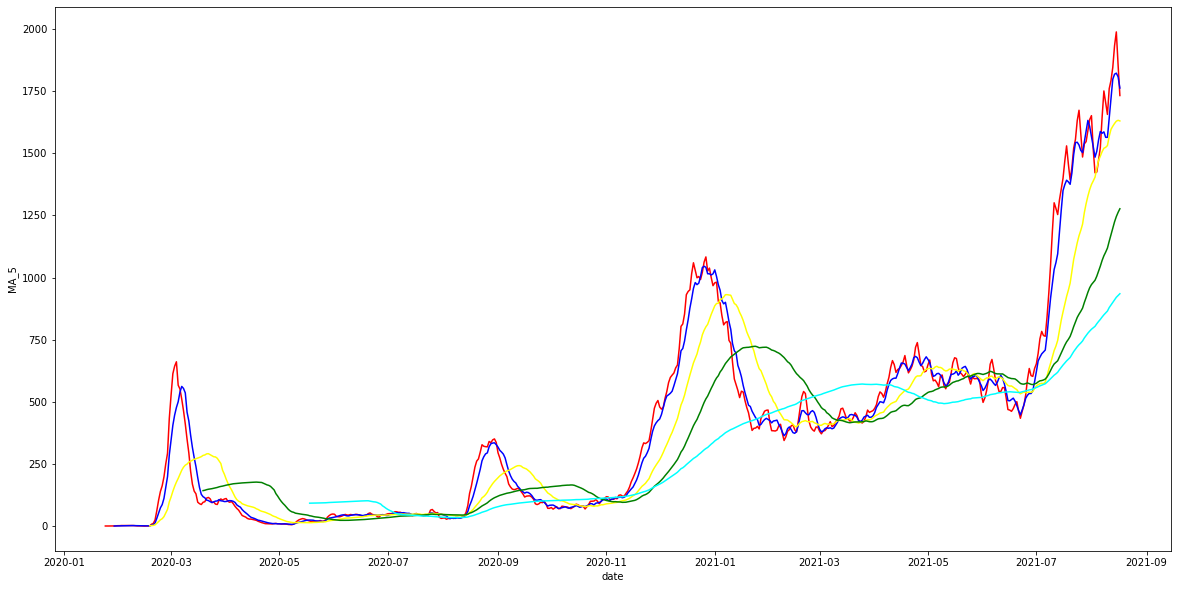

In [39]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df, x='date',y='MA_5',color='red') 
sns.lineplot(data=df, x='date',y='MA_10',color='blue')
sns.lineplot(data=df, x='date',y='MA_30',color='yellow')
sns.lineplot(data=df, x='date',y='MA_60',color='green')
sns.lineplot(data=df, x='date',y='MA_120',color='cyan')

#### 1차 대유행 (2020.2~2020.3)
#### 2차 대유행 (2020.8~2020.9)
#### 3차 대유행 (2020.11~2021.1)

#### 2020년 2월 말 1차 대유행
#### 2020년 8월 말 2차 대유행
#### 2021년 1월 초 3차 대유행이 10일선과, 30일선의 추세가 꺾이고 나서 진정